The differential scattering cross-section of Compton scattering can be derived according to the [Klein-Nishina formula](https://en.wikipedia.org/wiki/Klein%E2%80%93Nishina_formula). The derivation can be found in any quantum field theory textbook, and here's a calculation provided in [Professor Yu's lecture notes from Sun Yat-sen University](https://yzhxxzxy.github.io/teaching/1807_QFT.pdf).

\begin{equation}
\frac{\mathrm{d} \sigma}{\mathrm{d} \cos \theta}=\frac{\pi \alpha^2 \omega^{\prime 2}}{m_e^2 \omega^2}\left(\frac{\omega^{\prime}}{\omega}+\frac{\omega}{\omega^{\prime}}-\sin ^2 \theta\right) 
\end{equation}

Here, $m_e$ is the electron mass, $\alpha$ is the fine-structure constant, $\omega$ is the angular frequency of the incident photon, $\theta$ is the scattering angle, and $\omega'$ is the angular frequency of the scattered photon, satisfying

$$
\omega^{\prime}=\left(\frac{1-\cos \theta}{m_e}+\frac{1}{\omega}\right)^{-1}=\frac{\omega}{1+\frac{\omega}{m_e}(1-\cos \theta)}
$$

An elegant python code to get the plot can be found [here](https://scipython.com/blog/the-kleinnishina-formula/)

In [27]:
import numpy as np
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
# plt.rcParams['text.usetex'] = True
from astropy.visualization import quantity_support
quantity_support()

import os
path='./figs/'
os.makedirs(path,exist_ok=True) 

In [28]:
print(const.e,end='\n'*2)
print(const.m_e,end='\n'*2)
print(const.alpha,end='\n'*2)

  Name   = Electron charge
  Value  = 1.602176634e-19
  Uncertainty  = 0.0
  Unit  = C
  Reference = CODATA 2018

  Name   = Electron mass
  Value  = 9.1093837015e-31
  Uncertainty  = 2.8e-40
  Unit  = kg
  Reference = CODATA 2018

  Name   = Fine-structure constant
  Value  = 0.0072973525693
  Uncertainty  = 1.1e-12
  Unit  = 
  Reference = CODATA 2018



In [29]:
def gamma_out_ratio(theta,omega_in):
    return 1/(1+omega_in/(const.m_e*const.c**2)*(1-np.cos(theta)))

def Klein_Nishin_formula(theta,omega):
    '''
    return d\\sigma/d\\cos(\\theta)
    '''
    
    omega_p_over_omega = gamma_out_ratio(theta,omega)
    diff_cross = np.pi*const.alpha**2/(const.m_e*const.c**2)**2*omega_p_over_omega**2*(omega_p_over_omega+1/omega_p_over_omega-np.sin(theta)**2)
    return (diff_cross*(const.h*const.c)**2).to(u.barn)

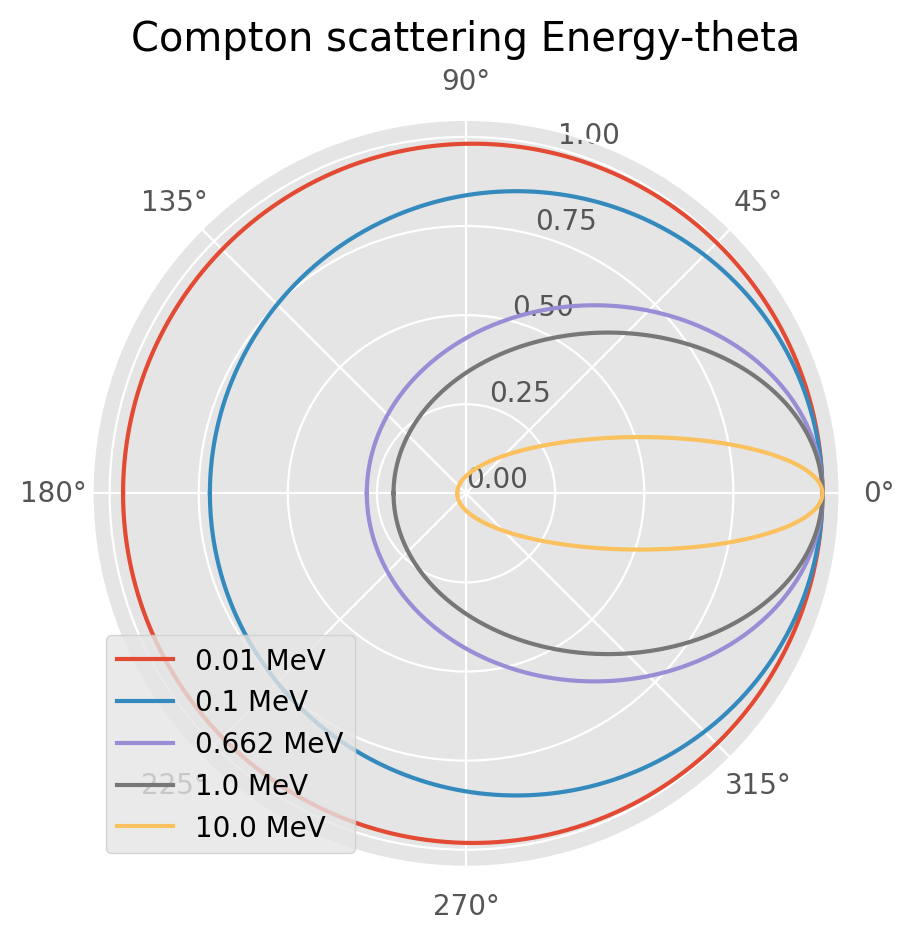

In [30]:
# %matplotlib qt5
thetas = np.linspace(-np.pi,np.pi,1000)
energys = [0.01,0.1,0.662,1,10]*u.MeV
ax = plt.subplot(projection='polar')
for i in energys:
    Energy_theta = gamma_out_ratio(thetas,i)
    ax.plot(thetas,Energy_theta,label=f'{i}')


ax.set_ylabel(Energy_theta.unit,loc='top')
ax.set_rlabel_position(75)  # Move radial labels away from plotted line
ax.set_yticks(np.linspace(0,1,5))
ax.grid(True)
ax.legend(loc='lower left')
ax.set_title('Compton scattering Energy-theta')

fig=ax.get_figure()
fig.tight_layout()
fig.savefig(path+'Compton scattering Energy-theta polar.pdf')



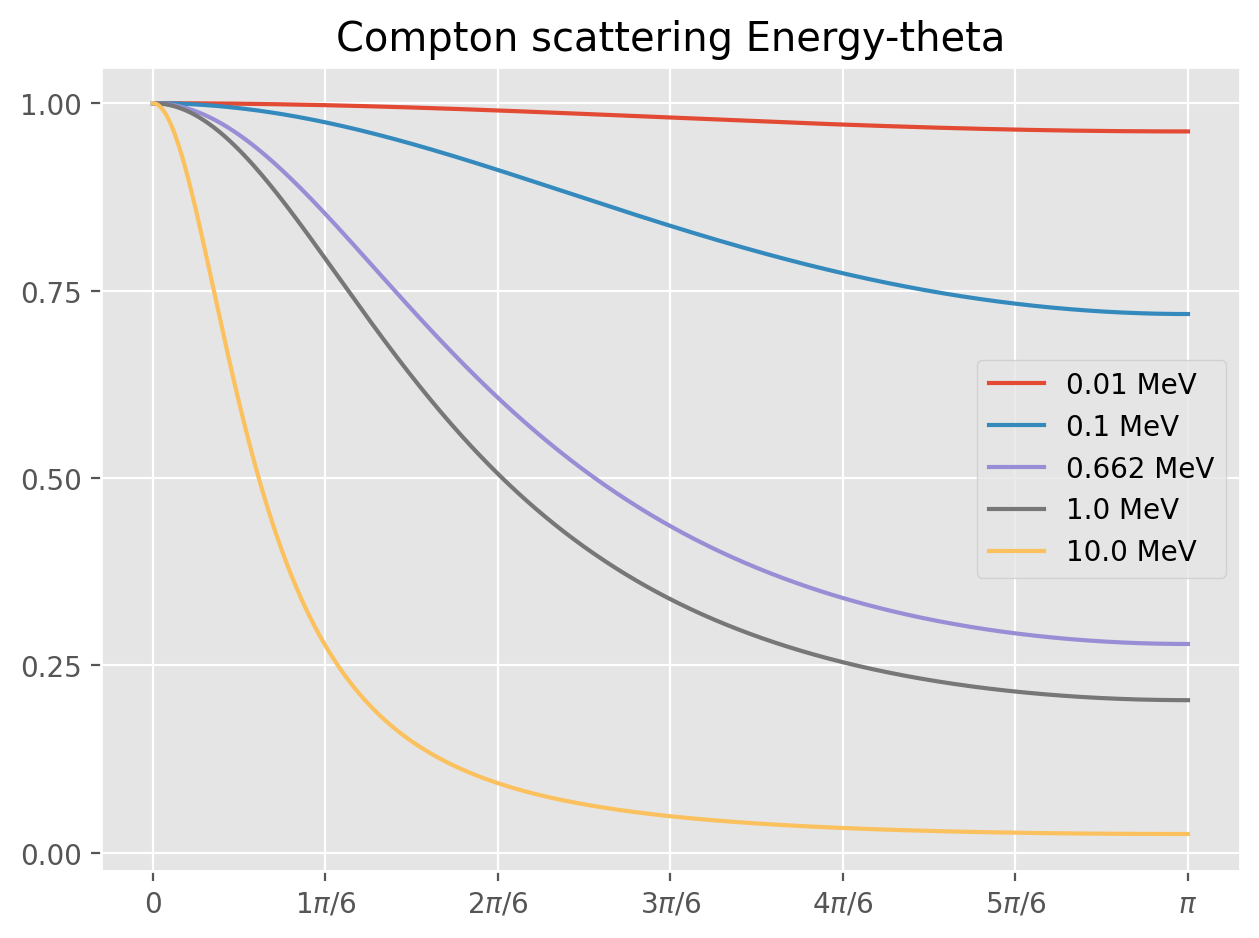

In [31]:
# %matplotlib qt5
thetas = np.linspace(0,np.pi,1000)
energys = [0.01,0.1,0.662,1,10]*u.MeV
ax = plt.subplot()
for i in energys:
    Energy_theta = gamma_out_ratio(thetas,i)
    ax.plot(thetas,Energy_theta,label=f'{i}')

ax.set_ylabel(Energy_theta.unit,loc='top')
ax.set_yticks(np.linspace(0,1,5))
interval_number = 6
ax.set_xticks(np.linspace(0,np.pi,interval_number+1),
              ['$0$']+[fr'${i}\pi/{interval_number}$' for i in range(1,interval_number)]+[r'$\pi$'])
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Compton scattering Energy-theta')
fig=ax.get_figure()
fig.tight_layout()
fig.savefig(path+'Compton scattering Energy-theta.pdf')

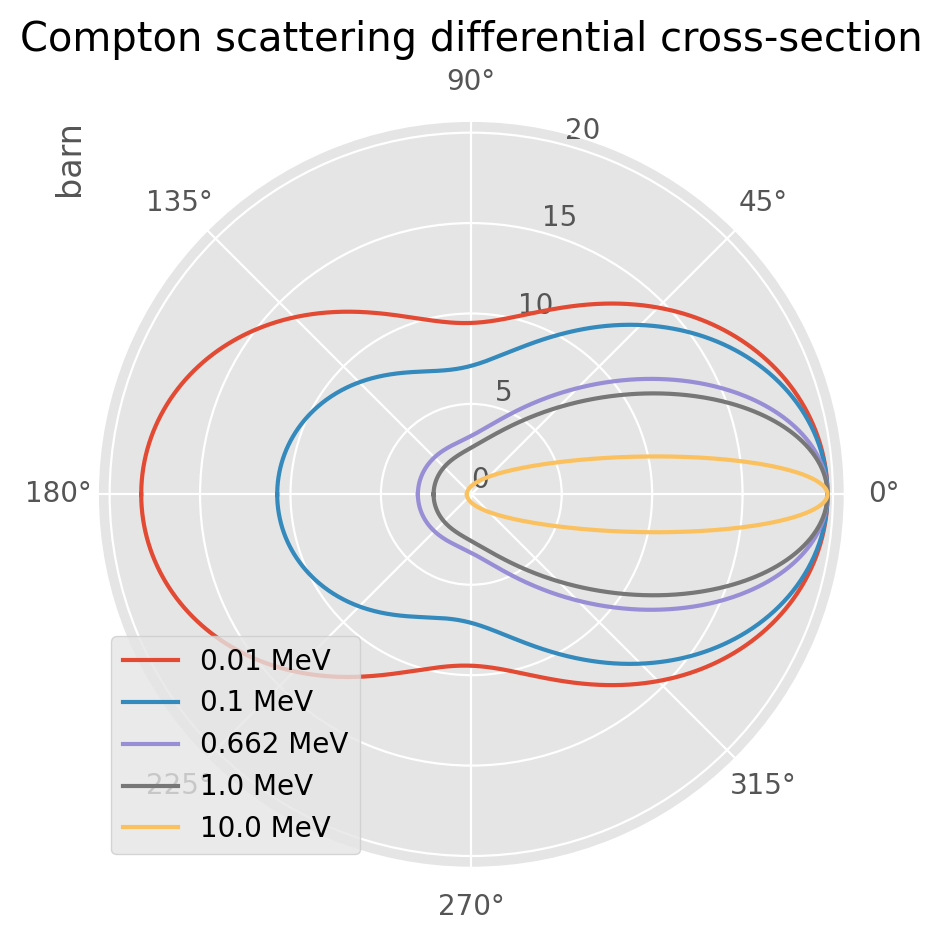

In [32]:
thetas = np.linspace(-np.pi,np.pi,1000)
energys = [0.01,0.1,0.662,1,10]*u.MeV

ax = plt.subplot(projection='polar')
# ax1.set_rticks(4)  # Less radial ticks
for i in energys:
    Energy_theta = Klein_Nishin_formula(thetas,i)
    ax.plot(thetas,Energy_theta,label=f'{i}')

ax.set_ylabel(Energy_theta.unit,loc='top')
ax.set_rlabel_position(75)  # Move radial labels away from plotted line
ax.set_yticks(np.linspace(0,20,5)*u.barn)
ax.grid(True)
ax.legend(loc='lower left')
ax.set_title('Compton scattering differential cross-section')
fig=ax.get_figure()
fig.tight_layout()
fig.savefig(path+'Compton scattering differential cross-section polar.pdf')

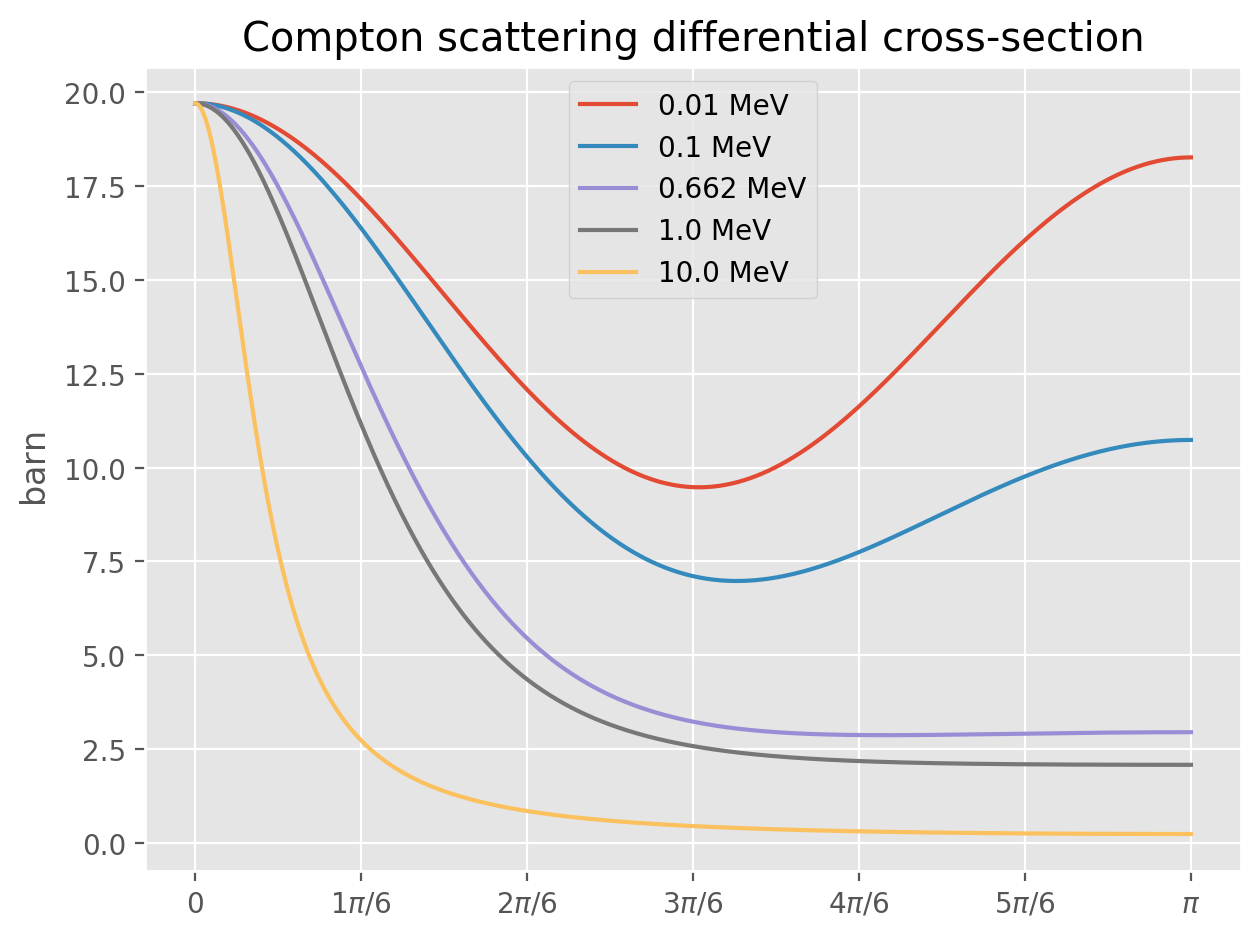

In [33]:
thetas = np.linspace(0,np.pi,1000)
ax = plt.subplot()
# ax1.set_rticks(4)  # Less radial ticks
for i in energys:
    Energy_theta = Klein_Nishin_formula(thetas,i)
    ax.plot(thetas,Energy_theta,label=f'{i}')

interval_number = 6
ax.set_xticks(np.linspace(0,np.pi,interval_number+1),
              ['$0$']+[fr'${i}\pi/{interval_number}$' for i in range(1,interval_number)]+[r'$\pi$'])
ax.grid(True)
ax.legend()
ax.set_title('Compton scattering differential cross-section')
fig=ax.get_figure()
fig.tight_layout()
fig.savefig(path+'Compton scattering differential cross-section.pdf')